In [1]:
import pandas as pd
# Load the dataset
df = pd.read_csv("Amazon Sale Report.csv")
# Display the first few rows
print(df.head())
# Display the Information of data
print(df.info())
# Display the description of data
print(df.describe())
# Check for missing values and data types
print(df.isnull().sum())

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...       IN

In [2]:
# Drop columns with excessive missing values
df.drop(columns=['New', 'PendingS', 'fulfilled-by'], inplace=True)

# Drop rows with missing 'currency' or 'Amount'
df.dropna(subset=['currency', 'Amount'], inplace=True)

# Impute or drop rows with remaining missing values
df.dropna(subset=['ship-city', 'ship-state', 'ship-postal-code', 'ship-country'], inplace=True)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')

# Convert 'ship-postal-code' to object
df['ship-postal-code'] = df['ship-postal-code'].astype(str)

# Verify the cleaning steps
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 13337 entries, 0 to 14205
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               13337 non-null  int64         
 1   Order ID            13337 non-null  object        
 2   Date                13337 non-null  datetime64[ns]
 3   Status              13337 non-null  object        
 4   Fulfilment          13337 non-null  object        
 5   Sales Channel       13337 non-null  object        
 6   ship-service-level  13337 non-null  object        
 7   Category            13337 non-null  object        
 8   Size                13337 non-null  object        
 9   Courier Status      13337 non-null  object        
 10  Qty                 13337 non-null  int64         
 11  currency            13337 non-null  object        
 12  Amount              13337 non-null  float64       
 13  ship-city           13337 non-null  object        


Total Sales: 8350520.5
Average Sales: 626.1168553647747


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


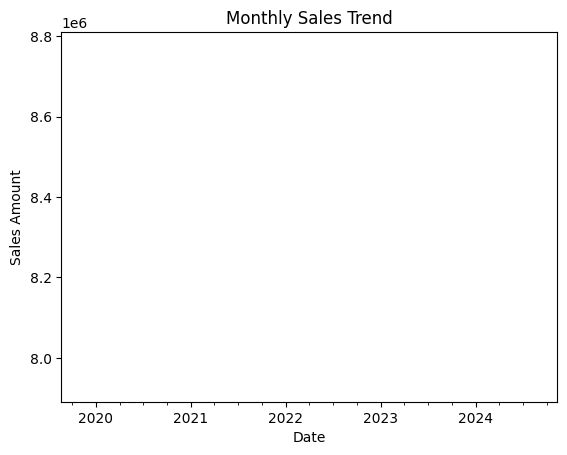

In [3]:
import matplotlib.pyplot as plt

# Calculate total and average sales
total_sales = df['Amount'].sum()
average_sales = df['Amount'].mean()
print(f"Total Sales: {total_sales}")
print(f"Average Sales: {average_sales}")

# Plot sales trends over time
df.set_index('Date', inplace=True)
sales_trend = df['Amount'].resample('M').sum()
sales_trend.plot(title='Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

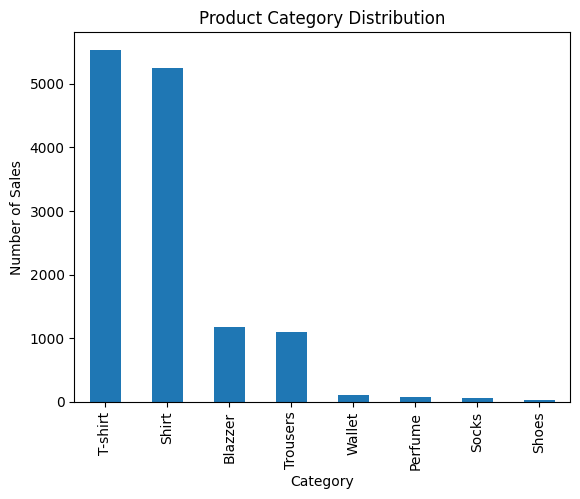

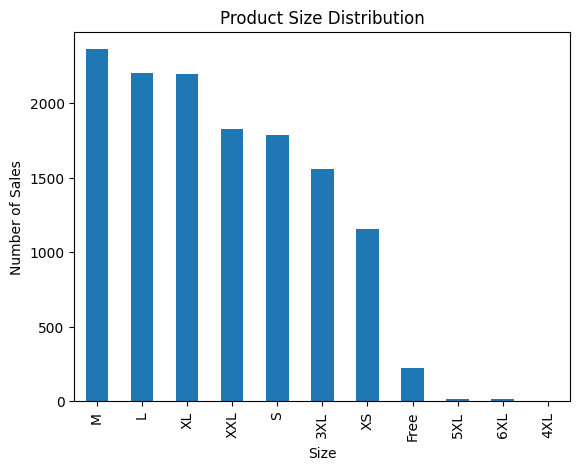

In [4]:
# Product category distribution
category_distribution = df['Category'].value_counts()
category_distribution.plot(kind='bar', title='Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.show()

# Product size and quantity analysis
size_distribution = df['Size'].value_counts()
size_distribution.plot(kind='bar', title='Product Size Distribution')
plt.xlabel('Size')
plt.ylabel('Number of Sales')
plt.show()

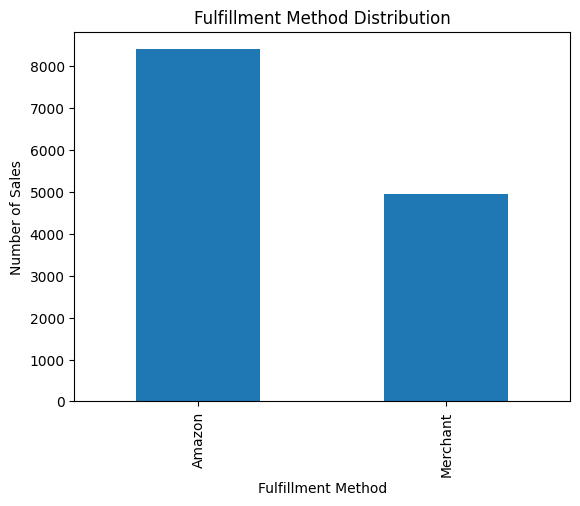

In [5]:
# Fulfillment method distribution
fulfillment_distribution = df['Fulfilment'].value_counts()
fulfillment_distribution.plot(kind='bar', title='Fulfillment Method Distribution')
plt.xlabel('Fulfillment Method')
plt.ylabel('Number of Sales')
plt.show()

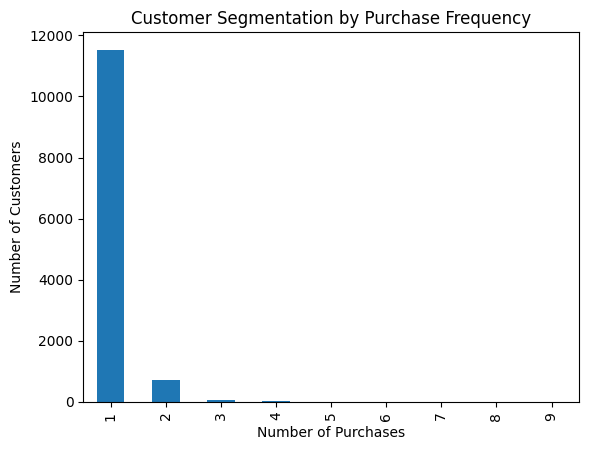

In [6]:
# Customer segmentation by frequency of purchase
customer_segment = df.groupby('Order ID').size().value_counts()
customer_segment.plot(kind='bar', title='Customer Segmentation by Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

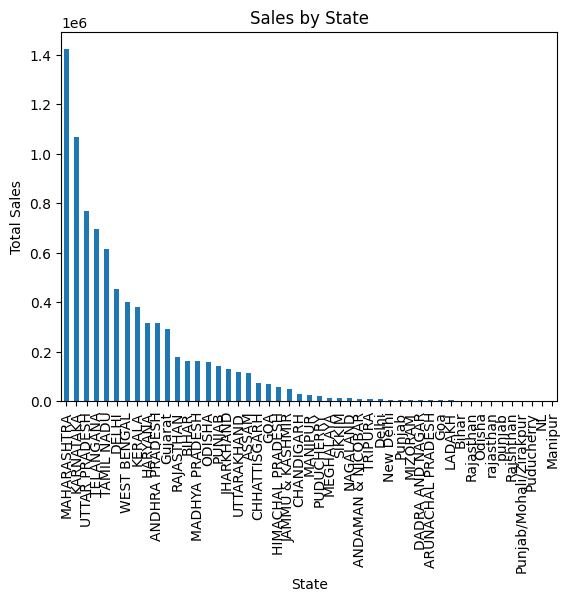

In [8]:
# Sales by state
state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)
state_sales.plot(kind='bar', title='Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

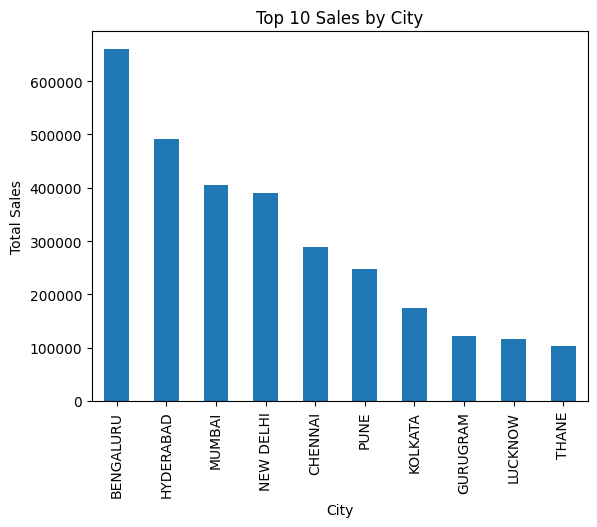

In [9]:
# Sales by city
city_sales = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10)
city_sales.plot(kind='bar', title='Top 10 Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

In [10]:
# Summarize findings
print("Key Findings:")
print(f"Total Sales: {total_sales}")
print(f"Average Sales: {average_sales}")
print(f"Top Selling Category: {category_distribution.idxmax()}")
print(f"Top Selling Size: {size_distribution.idxmax()}")
print(f"Most Used Fulfillment Method: {fulfillment_distribution.idxmax()}")
print(f"State with Highest Sales: {state_sales.idxmax()}")

# Provide recommendations
print("\nRecommendations:")
print("1. Focus on promoting the top-selling product categories and sizes.")
print("2. Optimize inventory for the most popular products.")
print("3. Improve fulfillment methods to enhance customer satisfaction.")
print("4. Target marketing efforts on regions with high sales potential.")
print("5. Implement strategies to increase customer retention and repeat purchases.")

Key Findings:
Total Sales: 8350520.5
Average Sales: 626.1168553647747
Top Selling Category: T-shirt
Top Selling Size: M
Most Used Fulfillment Method: Amazon
State with Highest Sales: MAHARASHTRA

Recommendations:
1. Focus on promoting the top-selling product categories and sizes.
2. Optimize inventory for the most popular products.
3. Improve fulfillment methods to enhance customer satisfaction.
4. Target marketing efforts on regions with high sales potential.
5. Implement strategies to increase customer retention and repeat purchases.
